In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problem Statement:**

**About Company**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.


Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/content/drive/MyDrive/train_ctrUa4K.csv')

In [4]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Dataset Description:
Loan_ID--------------> Unique Loan ID,
Gender --------------> Male/ Female,
Married --------------> Applicant married (Y/N),
Dependents ------------> Number of dependents,
Education -------------> Applicant Education (Graduate/ Under Graduate),
Self_Employed ---------> Self-employed (Y/N),
ApplicantIncome -------> Applicant income,
CoapplicantIncome -----> Coapplicant income,
LoanAmount -----------> Loan amount in thousands,
Loan_Amount_Term ------> Term of a loan in months,
Credit_History --------> Credit history meets guidelines,
Property_Area ---------> Urban/ Semi-Urban/ Rural,
Loan_Status -----------> Loan approved (Y/N).

In [5]:
train.shape

(614, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Drop the columns which is not relevant
train = train.drop(columns=['Loan_ID'])

In [9]:
train.head()#show data form top

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

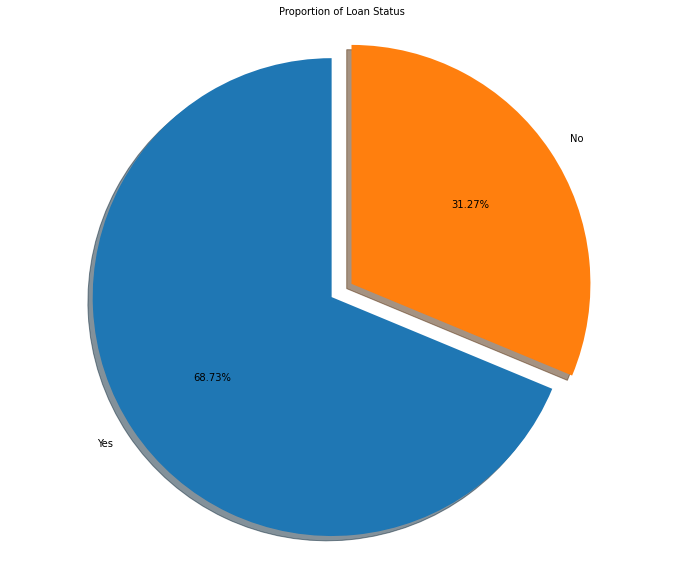

In [12]:
# Pie chart to display the amount (percentage) distribution of the Target Variable
labels = 'Yes', 'No'
sizes = [train.Loan_Status[train['Loan_Status']=='Y'].count(), train.Loan_Status[train['Loan_Status']=='N'].count()]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Loan Status", size = 10)
plt.show()

From above pie chart,we can see that around 69% of the loan has been approved while 31% loan application was not approved, which means about 2/3rd of applicants have been granted loan.

## Univariate Analysi

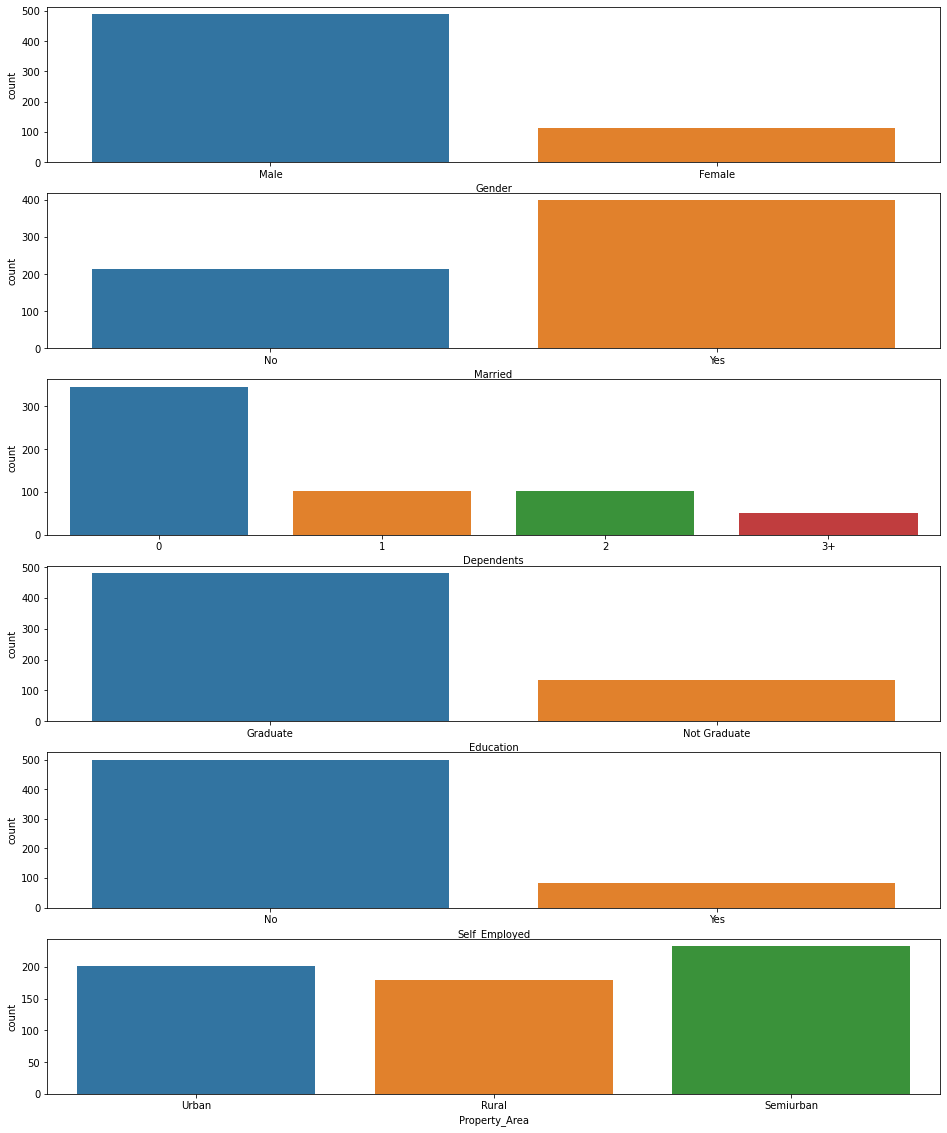

In [13]:
fig, ax=plt.subplots(nrows=6, ncols=1, figsize= (16,20))
cols_ = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
for ind, col in enumerate(cols_):
  sns.countplot(x=col,data=train, ax=ax[ind])

Plots above convey following things about the dataset:

Sex: There are more Men than Women (approx. 3x)

Martial Status: 2/3rd of the population in the dataset is Marred.

Dependents: Majority of the population have zero dependents and are also likely 
to accepted for loan.

Education: About 5/6th of the population is Graduate.

Employment: 5/6th of population is not self employed.

Property Area: More applicants from Semi-urban area.

Bi-Variate Analysis

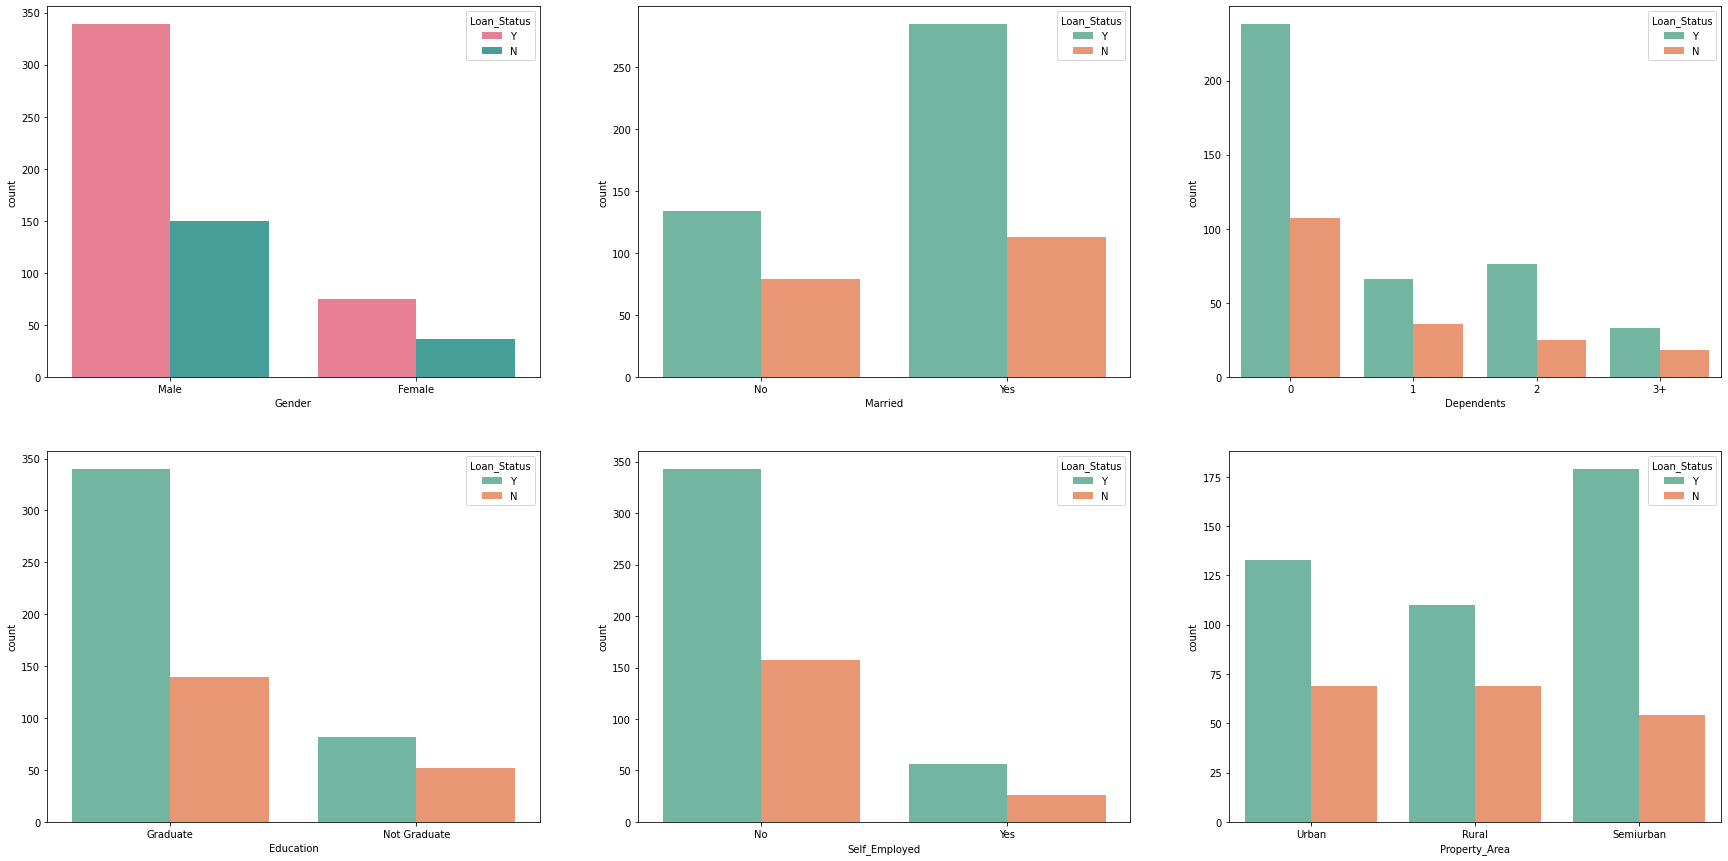

In [14]:
# Count column plots to map the dependence of 'Loan_Status' column on categorical features
from IPython.core.pylabtools import figsize
fig, ax = plt.subplots(2,3, figsize= (30,15))

sns.countplot(x='Gender', hue='Loan_Status', data=train, palette='husl', ax=ax[0][0])
sns.countplot(x='Married', hue='Loan_Status', data=train, palette='Set2', ax=ax[0][1])
sns.countplot(x='Dependents', hue='Loan_Status', data=train, palette='Set2', ax=ax[0][2])
sns.countplot(x='Education', hue='Loan_Status', data=train, palette='Set2', ax=ax[1][0])
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train, palette='Set2', ax=ax[1][1])
sns.countplot(x='Property_Area', hue='Loan_Status', data=train, palette='Set2', ax=ax[1][2])

plt.show()

**Observation from the above plots**

Gender: We can observe that Male applicants had more chances of getting loan in comparison with female applicants.

Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval.

Employment: Applicants who are not self employed has higher chance of getting loan.

Applicant with credit history are far more likely to be accepted.

Property Area: More applicants from Semi-urban and also likely to be granted loans.

[Text(0.5, 0, 'ApplicantIncome'),
 Text(1.5, 0, 'CoapplicantIncome'),
 Text(2.5, 0, 'LoanAmount'),
 Text(3.5, 0, 'Loan_Amount_Term'),
 Text(4.5, 0, 'Credit_History')]

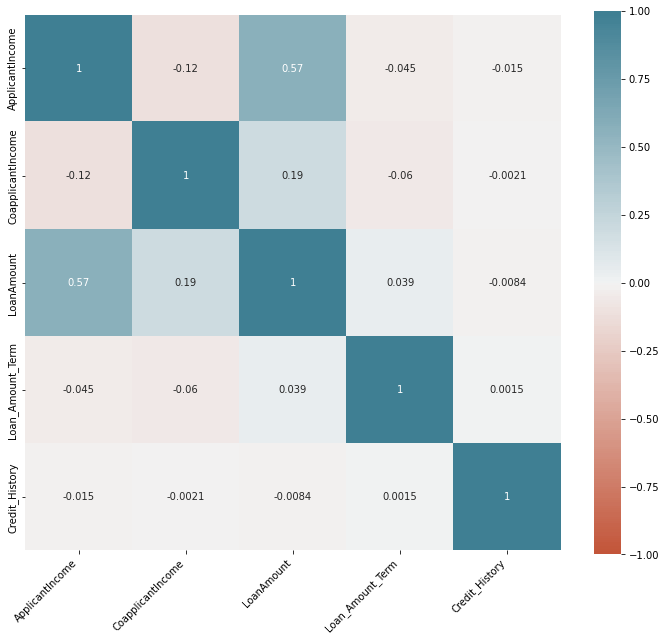

In [15]:
 #Displaying Correlation between varaibles using heatmap
plt.figure(figsize = (12, 10))
cor = train.corr()
ax =sns.heatmap(cor, 
    vmin=-1, vmax=1, center=0,annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [16]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling of missing values

In [17]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) # Mode
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) # Mode
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) # Mode
train['Married'].fillna(train['Married'].mode()[0], inplace=True) # Mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) # Mode

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True) # Mean
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True) # Mean


In [18]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# Handling Categorical Variable

train.Loan_Status = train.Loan_Status.replace({"Y":1, "N":0})
train.Gender = train.Gender.replace({"Male":1, "Female":0})
train.Married = train.Married.replace({"Yes": 1, "No" : 0})
train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})



In [20]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Education', 'Property_Area','Dependents']
le = LabelEncoder()
for col in feature_col:
  train[col] = le.fit_transform(train[col])

In [21]:
train.head(10
    
)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


Finally, We have all the features with numerical values

In [22]:
# Split Features and Target Varible
X = train[['Gender', 'Married', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]
y = train['Loan_Status']

In [23]:
# Splitting into Train -Test Data

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)


In [24]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((491, 7), (123, 7), (491,), (123,))

## **Model Building & Evaluation**

In [25]:
from sklearn.tree import DecisionTreeClassifier



clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [26]:
y_pred = clf.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [28]:
accuracy_score(y_pred,y_test)

0.7967479674796748

In [29]:
confusion_matrix(y_pred,y_test)

array([[12,  1],
       [24, 86]])

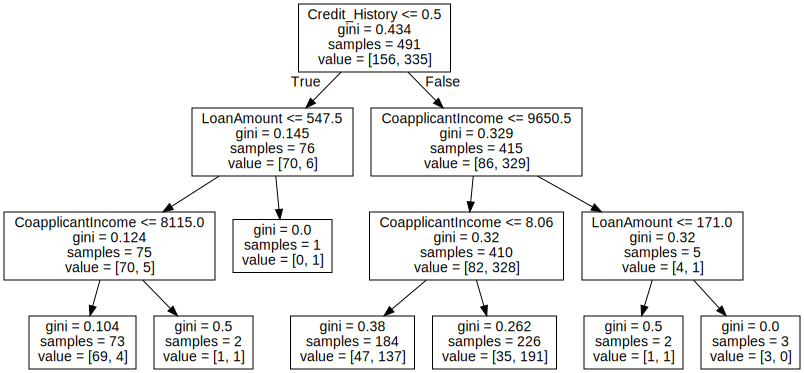

In [30]:
# Visulazing Decision Tree with Max Depth = 3

import graphviz
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names= X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [31]:
  #param_dist= {
     # "criterion":["gini","entropy"],
   #   "max_depth":[1,2,3,4,5,6,7,None]
 # }

In [32]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 35),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5,n_jobs=-1)
  
tree_cv.fit(X_train, y_train)
  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_f

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 9),
                                        'min_samples_leaf': range(1, 35)})

In [35]:
  # Print the tuned parameters and score

  print('Turned Decision Tree Paramanter: {}'.format(tree_cv.best_estimator_))
  print('Best score is {}:'.format(tree_cv.best_score_))

Turned Decision Tree Paramanter: DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6,
                       min_samples_leaf=19)
Best score is 0.8126365697794269:


In [36]:
#from sklearn.model_selection import GridSearchCV
#gird = GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [37]:
#gird.fit(X_train,y_train)

In [38]:
#gird.best_estimator_

In [39]:
#gird.best_score_

In [40]:
#gird.best_params_


Text(69.0, 0.5, 'Truth')

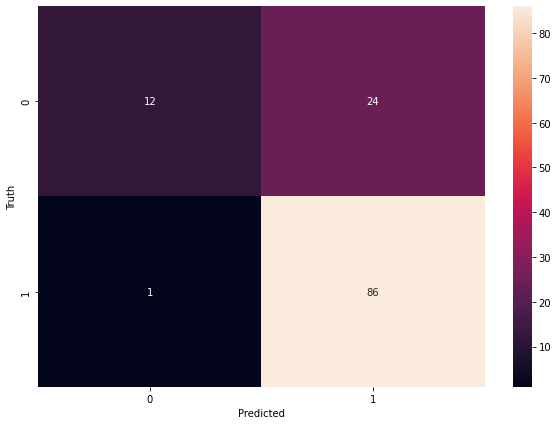

In [41]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize= (10,7))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
# Savein the model 
import pickle
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/Automating_Loan_Prediction_Model.pkl", mode = "wb") 
pickle.dump(clf,pickle_out)
pickle_out.close()

Model Deployment of the Loan Prediction model using Streamlit

In [43]:
!pip install -q streamlit

     |████████████████████████████████| 9.7 MB 5.2 MB/s 
     |████████████████████████████████| 4.3 MB 55.6 MB/s 
     |████████████████████████████████| 164 kB 42.1 MB/s 
     |████████████████████████████████| 111 kB 51.7 MB/s 
     |████████████████████████████████| 180 kB 51.5 MB/s 
     |████████████████████████████████| 76 kB 4.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 127 kB 54.5 MB/s 
     |████████████████████████████████| 792 kB 46.7 MB/s 
     |████████████████████████████████| 375 kB 52.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.26 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.7.0 which is incompatible.
google-colab 1.0.0 requires ipytho

In [44]:
!pip install -q pyngrok

     |████████████████████████████████| 745 kB 5.1 MB/s 


In [45]:
!pip install -q streamlit_ace

     |████████████████████████████████| 3.6 MB 4.9 MB/s 


In [46]:
!ngrok authtoken 23cwfdG86UStC0BtAbWcjdyh1UC_6mBvohvL3dNfdDvT4jSpS

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [47]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('/content/drive/MyDrive/Colab Notebooks/Automating_Loan_Prediction_Model.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(Gender, Married, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1

    if Self_Employed == "Yes":
       Self_Employed = 1
    else:
      Self_Employed = 0
 
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    LoanAmount = LoanAmount / 1000
 
    # Making predictions 
    prediction = classifier.predict( 
        [[Gender, Married, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred
      
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:green;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Automated Loan Prediction App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    Self_Employed = st.selectbox('Employment Status',("Self Employed","Non Self Employed"))
    ApplicantIncome = st.number_input("Applicants monthly income") 
    CoapplicantIncome = st.number_input("Co-Applicants monthly income")
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Gender, Married, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)
     
if __name__=='__main__': 
    main()

Writing app.py


In [48]:
# THIS IS THE DEFAULT SERVER WHERE OUR STREAMLIT MODEL WILL GET DEPLOYED
!streamlit run app.py &>/dev/null&

In [49]:
# USING PYNGROK SO THAT WE CAN CHECK THE URL WHERE OUR MODEL IS BEING DEPLOYED
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://7b9a-35-185-66-97.ngrok.io" -> "http://localhost:8501">

In [50]:
ngrok.kill()